In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# K-Means

- 몆번의 반복으로 데이터셋을 빠르고 효율적으로 클러스터로 묶는 알고리즘
- 1957년 Bell Lab. 스튜어트 로이드(Stuart Lloyd)가 펄스 부호 변조(pulse-code modulation) 기법으로 제안
    - 1982년 외부에 공개
- 1965년 에드워드 포지(Edward W. Forgr)도 동일한 알고리즘 발표
- k-평균을 로이드-포지 알고리즘이라 부름

## k-평균 군집화 알고리즘
- 군집의 중심이 되는 k개 seed 점들을 선택하여 이 seed와 가까운 개체들을 그룹화하는 방법

**알고리즘**
1. k개 중심점(centroid)을 임의로 배치한다
    - 무작위로 k개 샘플을 선택하여 중심점으로 결정
2. 모든 자료와 k개의 중심점과 거리를 계산하여 가장 가까운 중심점의 군집으로 할당한다.
3. 군집의 중심을 구한다(평균을 구한다)
4. 정지 규칙에 이를 때까지 2~3단계를 반복한다
    - 군집의 변화가 없을 때
    - 중심점의 이동이 임계값 이하일 때

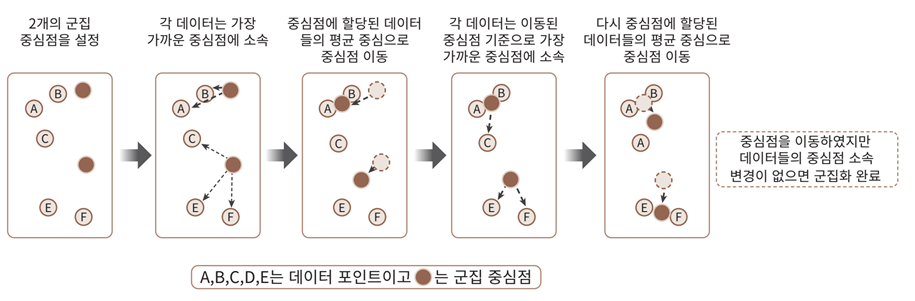

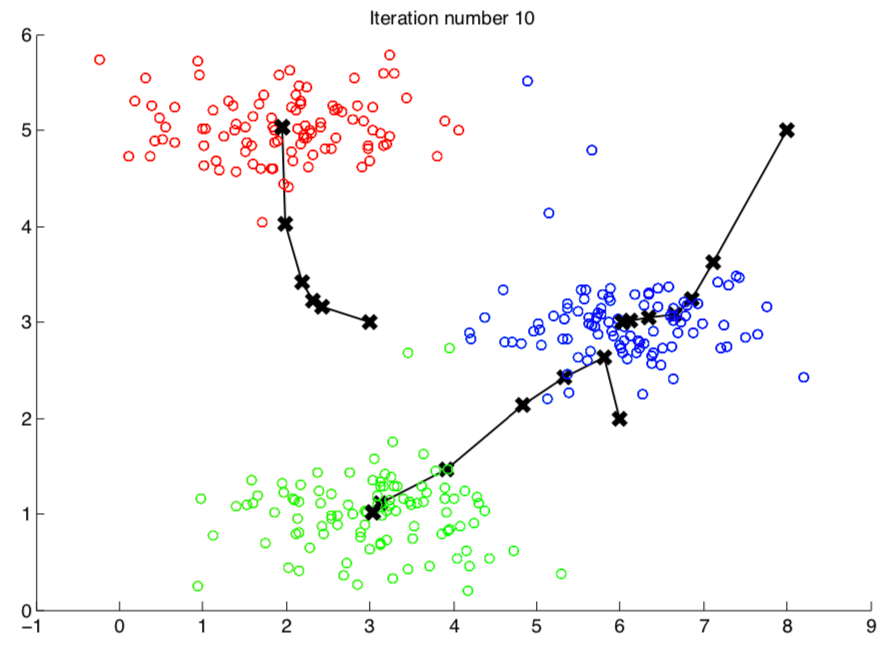

## K-평균 장점과 단점
- **장점**
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
    
    
- **단점**
    - 거리 기반 알고리즘으로 속성의 개수가 많을 경우 군집화 정확도가 떨어짐
        - PCA와 같은 차원축소를 적용할 수 있음
    - 반복을 수행하는데 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
    - 몇 개의 클러스터(군집)를 선택해야 할지 가이드하기 어려움

## 사이킷런의 군집 알고리즘 클래스 KMeans
**sklearn.cluster의 `KMeans`**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**`KMeans` 클래스**

- 기본적으로 최적화된 알고리즘을 적용


- K-평균 초기화 파라미터 중 가장 중요한 파라미터
    - n_clutsers : 클러스터 개수(클러스터 중심점의 개수)
    - init : 초기에 클러스터 중심점 좌표를 설정할 방식
        - 디폴트는 'k-means++'
        - 임의로 중심점을 설정할 경우 'random'
    - max_iter : 최대 반복횟수
        - 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

#### KMeans 객체의 군집화 적용 메서드

**`fit(X)`** : k-평균 클러스터링을 계산

**`fit_predict(X)`** : 클러스터 중심을 계산하고 각 샘플에 대한 클러스터 인덱스를 예측

**`fit_transform(X)`**  :클러스터링을 계산하고 X를 클러스터 거리 공간으로 변환

#### K-means 결과를 가지고 있는 인스턴스들

**`labels_ 속성`** : 각 샘플에 할당된 레이블(클러스터 인덱스)

**`cluster_centers_ 속성`**: KMeans의 centriods 정보

------

## 실습1. 시뮬레이션 데이터 군집화

; 군집이 5개인 시뮬레이션 데이터를 생성하여 K-Means 군집화 결과 비교

### sklearn.datasets의 군집화를 위한 데이터 생성 API

-  make_blobs() / make_classification()
    - 여러 클래스에 해당하는 데이터 세트를 생성
    - 하나의 클래스에 여러 개의 군집(cluster)이 분포될 수 있게 데이터를 생성
    - 군집과 분류를 위한 테스트 데이터 생성을 위해 사용
    - 두 API의 차이점
        - make_blobs() 
            - 개별 군집의 중심점과 표준편차 제어 기능이 추가되어 있음       
        - make_classification()
            - 노이즈를 포함한 데이터를 만드는데 유용
            
  
- make_circle() / make_moon()
    - 중심 기반의 군집화로 해결하기 어려운 데이터 세트 생성

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

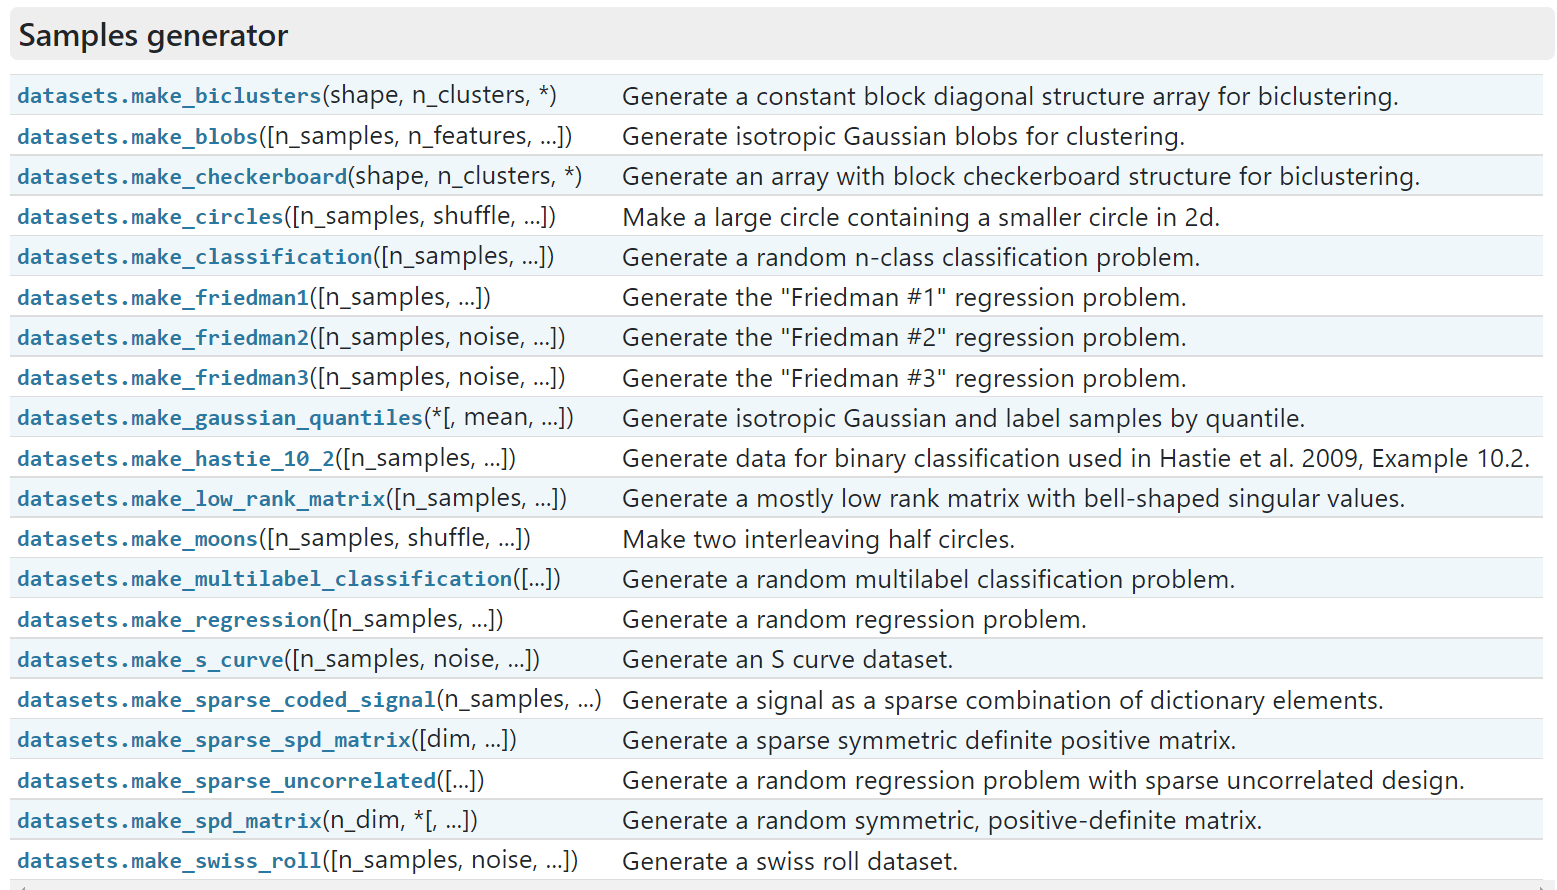

### make_blobs()를 이용한 데이터 생성

#### 모듈 임포트

In [2]:
from sklearn.datasets import make_blobs

#### 5개 군집 데이터셋 생성

- 5개 클러스터 중심을 갖는 2000개 데이터

In [10]:
blob_centers = np.array([[0.2,2.3],
                        [-1.5,2.3],
                        [-2.8,1.8],
                        [-2.8,2.8],
                        [-2.8,1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1,0.1])

x, y = make_blobs(n_samples=2000, centers = blob_centers, cluster_std = blob_std, random_state=7)

x.shape

(2000, 2)

**생성한 데이터셋의 산점도**

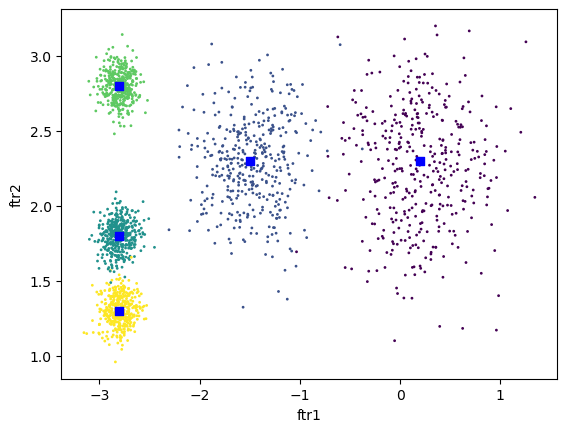

In [11]:
plt.scatter(x[:,0], x[:,1], c=y, s=1)
plt.scatter(blob_centers[:,0], blob_centers[:,1], marker='s', color='b')
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

### K-means로 군집화

#### k-means를 위한 클래스 임포트

In [12]:
from sklearn.cluster import KMeans

#### k-means 수행

In [13]:
k = 5
kmeans = KMeans(n_clusters= k, random_state= 42)
y_pred = kmeans.fit_predict(x)

In [14]:
y_pred.shape

(2000,)

#### labels_ 속성

- 각 샘플에 할당된 레이블(클러스터 인덱스)

In [15]:
# y값을 n_cluster수에 맞게 라벨링한 값
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

#### cluster_centers_ 속성
- KMeans의 centriods 정보

In [16]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [17]:
blob_centers

array([[ 0.2,  2.3],
       [-1.5,  2.3],
       [-2.8,  1.8],
       [-2.8,  2.8],
       [-2.8,  1.3]])

#### 군집화 결과 시각화

- 원래 centriod와 군집 결과 생성된 centriod 비교

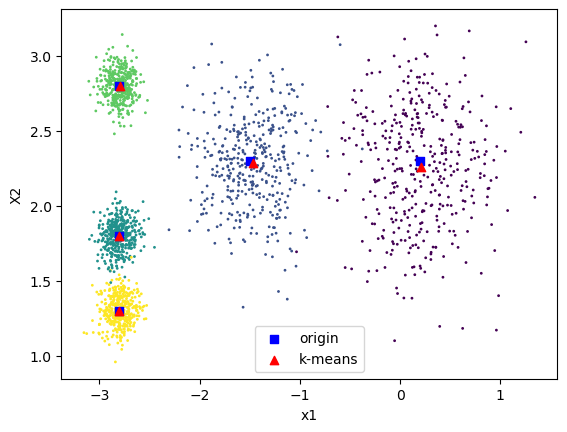

In [20]:
plt.scatter(x[:,0], x[:,1], c=y, s=1)
plt.scatter(blob_centers[:,0], blob_centers[:,1], marker='s', color='b', label='origin')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', color='r', label='k-means')
plt.xlabel('x1')
plt.ylabel('X2')
plt.legend()
plt.show()

## 실습2. iris dataset 군집화

### 데이터 로드

In [21]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

### K-means 수행

In [22]:
kmeans_iris = KMeans(n_clusters= 3, max_iter=300, random_state=0)
kmeans_iris.fit(x)

KMeans(n_clusters=3, random_state=0)

#### 군집화 결과 확인

In [23]:
kmeans_iris.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### 군집 결과 확인

In [25]:
iris_df = pd.DataFrame(x, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['target'] = y
iris_df['cluster'] = kmeans_iris.labels_
iris_df.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

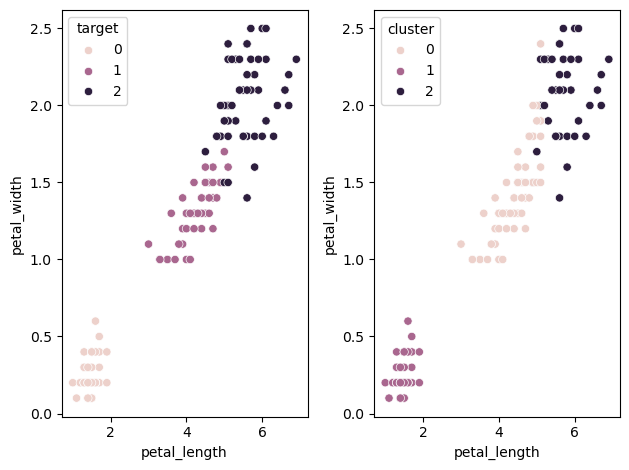

In [27]:
fig, ax = plt.subplots(ncols=2)
sns.scatterplot(data=iris_df, x='petal_length',y='petal_width', hue='target', ax=ax[0])
sns.scatterplot(data=iris_df, x='petal_length',y='petal_width', hue='cluster', ax=ax[1])
plt.tight_layout()
plt.show()

### PCA로 차원 축소된 붓꽃 데이터의 K-평균 군집화
: 붓꽃 데이터의 4개 피처들을 PCA를 적용하여 2차원으로 축소한 뒤 축소된 두 속성에 대하여 K-평균 군집화 수행

#### PCA로 차원축소

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
x_pca = pca.fit_transform(x)
iris_df['pca1'] = x_pca[:,0]
iris_df['pca2'] = x_pca[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca1,pca2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


#### 차원축소한 pca 데이터 시각화

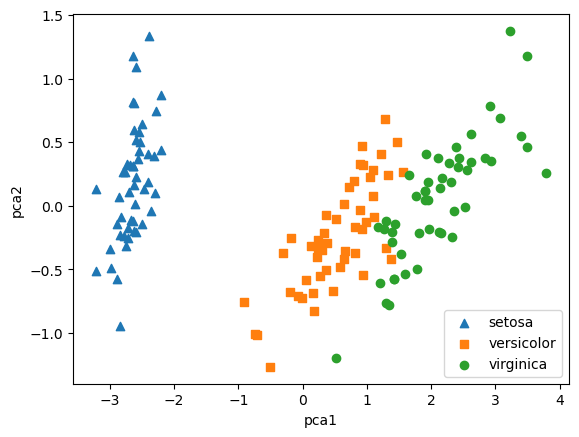

In [31]:
for i, m in enumerate(['^','s','o']):
    x = iris_df[iris_df.target == i].pca1
    y = iris_df[iris_df.target == i].pca2
    plt.scatter(x,y, marker=m, label= iris.target_names[i])
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

#### K-means한 결과를 차원축소한 데이터에 적용하여 시각화

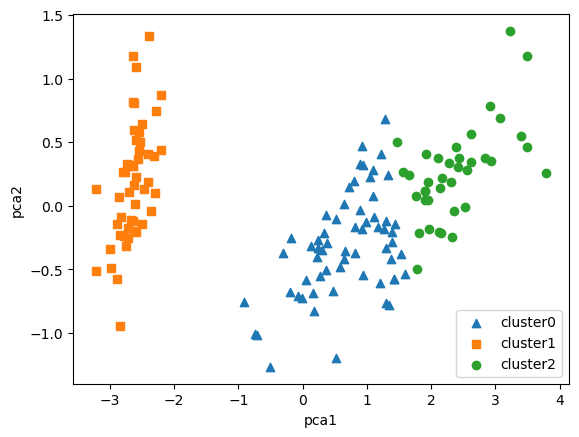

In [34]:
for i, m in enumerate(['^','s','o']):
    x = iris_df[iris_df.cluster == i].pca1
    y = iris_df[iris_df.cluster == i].pca2
    plt.scatter(x,y, marker=m, label= f'cluster{i}')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

#### 차원축소한 데이터를 K-Means한 결과 시각화

In [37]:
kmeans_pca = KMeans(n_clusters= 3, max_iter= 300, random_state=0)
kmeans_pca.fit(iris_df.iloc[:,-2:])
kmeans_pca.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [38]:
iris_df['pca_cluster'] = kmeans_pca.labels_
iris_df.groupby(['target','pca_cluster'])['sepal_length'].count()

target  pca_cluster
0       0              50
1       1               3
        2              47
2       1              36
        2              14
Name: sepal_length, dtype: int64

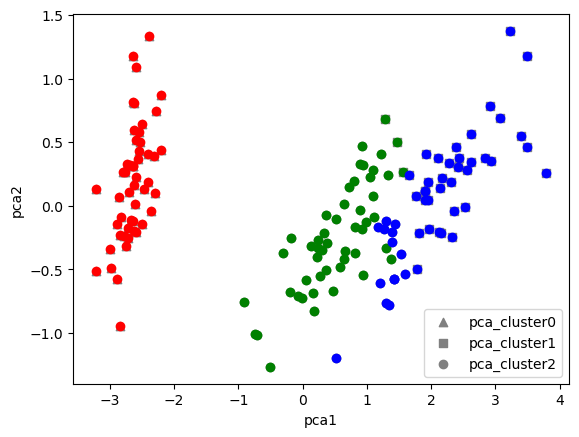

In [46]:
# 차원축소한 데이터에 대한 kmeans결과
for i, m in enumerate(['^','s','o']):
    x = iris_df[iris_df.pca_cluster == i].pca1
    y = iris_df[iris_df.pca_cluster == i].pca2
    plt.scatter(x,y, marker= m, color='gray', label= f'pca_cluster{i}')

# y값을 pca데이터에 적용
for i, c in enumerate(['r','g','b']):
    xo = iris_df[iris_df.target == i].pca1
    yo = iris_df[iris_df.target == i].pca2
    plt.scatter(xo,yo, color= c)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

-----

**K-means**
- 군집화: 주어진 데이터를 K개의 클러스터로 나누는 방법 / K = 사용자가 지정하는 클러스터(그룹)의 수
    - 과정:
        - 1. 데이터 포인트들 사이의 거리를 최소화하면서 가장 가까운 그룹에 데이터를 할당
          2. 이러한 반복 과정을 통해 클러스터의 구성이 더 이상 변하지 않을 때까지 계속 진행

- kmeans.labels_: K-means 군집화를 수행한 후에 각 데이터 포인트가 속한 클러스터의 인덱스를 나타내는 배열

- kmeans.cluster_centers_: 각 클러스터의 중심 위치를 나타내는 배열 / 클러스터 내의 모든 데이터 포인트들의 평균 위치